<a href="https://colab.research.google.com/github/Mithoonns2001/Neural-Network-For-Handwritten-Digits-Classification/blob/main/neural_network_for_handwritten_digits_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [36]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [23]:
y_test[0]

7

In [24]:
X_test[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

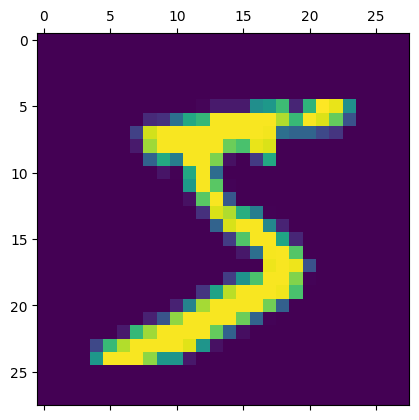

In [25]:
plt.matshow(X_train[0])

In [26]:
y_train[:7]

array([5, 0, 4, 1, 9, 2, 1], dtype=uint8)

In [27]:
X_train[0].shape

(28, 28)

In [37]:
# value scaling
X_train = X_train / 255
X_test = X_test / 255

In [38]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [31]:
X_train.shape

(60000, 28, 28)

In [39]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [33]:
X_train_flattened.shape

(60000, 784)

In [40]:
#training set
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#model training
model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4656 - accuracy: 0.8794
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3035 - accuracy: 0.9158
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2837 - accuracy: 0.9207
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2731 - accuracy: 0.9237
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2667 - accuracy: 0.9256


In [41]:
model.evaluate(X_train_flattened, y_train)

1875/1875 [==============================] - 3s 1ms/step - loss: 0.2600 - accuracy: 0.9287


[0.2600174844264984, 0.9286999702453613]

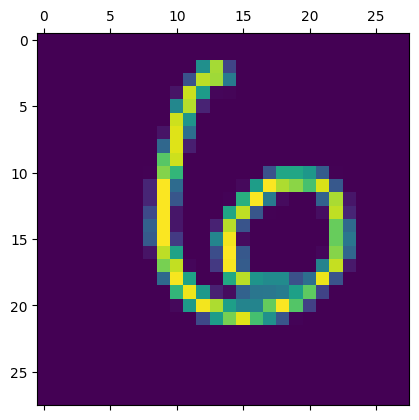

In [51]:
plt.matshow(X_test[100])

In [54]:
y_predict=model.predict(X_test_flattened)

y_predict[100]


313/313 [==============================] - 1s 2ms/step


array([5.3847642e-03, 1.6521845e-02, 6.3066113e-01, 2.9717771e-02,
       7.2156880e-03, 1.6525680e-03, 9.6262425e-01, 1.7980490e-03,
       3.0304823e-02, 7.3563459e-04], dtype=float32)

In [55]:
np.argmax(y_predict[100]) # numpy argmax to show max value index

6

In [57]:
y_predicted_label=[np.argmax(i) for i in y_predict] # applying argmax to all

In [59]:
y_predicted_label[100]

6

In [61]:
# confusion matrix

cm= tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_label)

In [62]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    3,    2,    0,    5,    6,    2,    1,    0],
       [   0, 1107,    5,    2,    0,    2,    3,    2,   14,    0],
       [   4,    6,  944,   10,    7,    3,   11,    8,   36,    3],
       [   3,    0,   28,  905,    0,   32,    2,   10,   24,    6],
       [   1,    1,   11,    1,  907,    0,    8,    4,   10,   39],
       [   7,    2,    8,   18,    6,  800,   10,    3,   32,    6],
       [  10,    3,   14,    1,    7,   14,  904,    2,    3,    0],
       [   1,    5,   29,    7,    9,    1,    0,  937,    4,   35],
       [   5,    6,    8,   20,    9,   30,    8,    7,  876,    5],
       [   9,    7,    2,    9,   25,    9,    0,   22,   11,  915]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'correct')

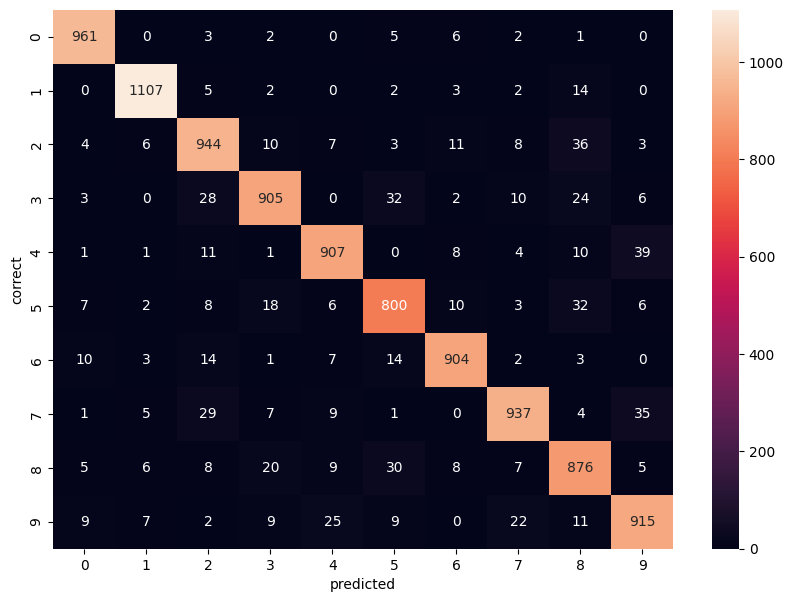

In [75]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')

plt.xlabel("predicted")
plt.ylabel("correct")

Adding hidden layer

In [78]:
#training set
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), # easy way to flatten using keras
    keras.layers.Dense(200, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')

])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#model training
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2366 - accuracy: 0.9325
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0991 - accuracy: 0.9712
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0667 - accuracy: 0.9798
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0475 - accuracy: 0.9849
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0360 - accuracy: 0.9890


313/313 [==============================] - 1s 2ms/step


Text(95.72222222222221, 0.5, 'correct')

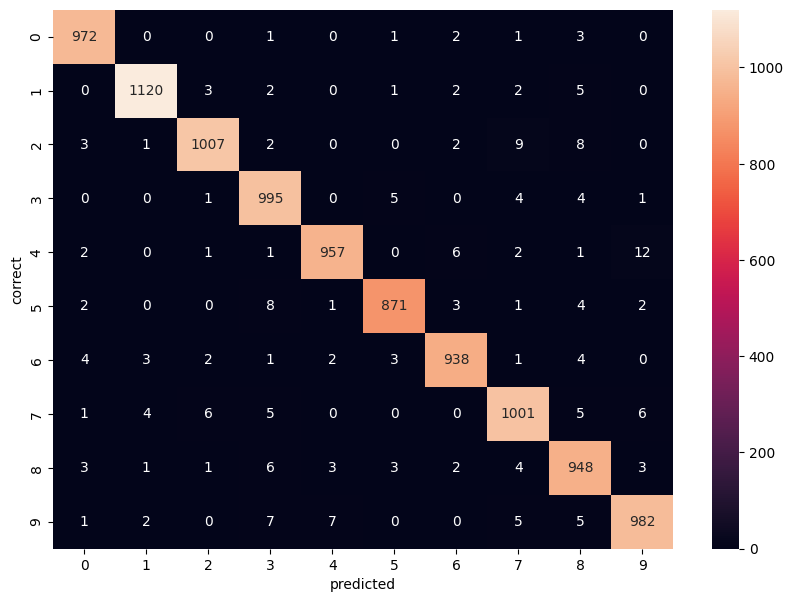

In [80]:
y_predict=model.predict(X_test)

y_predicted_label=[np.argmax(i) for i in y_predict] # applying argmax to all

cm= tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_label) # confusion matrix

import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')

plt.xlabel("predicted")
plt.ylabel("correct")